# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pyod.models.iforest import IForest
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

import project_utils

In [2]:
df = pd.read_csv("../data/windows_hi.csv")
df = df.set_index('Finestra')
model_var = df.columns

# Isolation Forest

In [3]:
model, labels, scores = project_utils.train_iforest(df, model_var)
df["outlier_iforest"] = labels
df["anomaly_score"] = scores

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


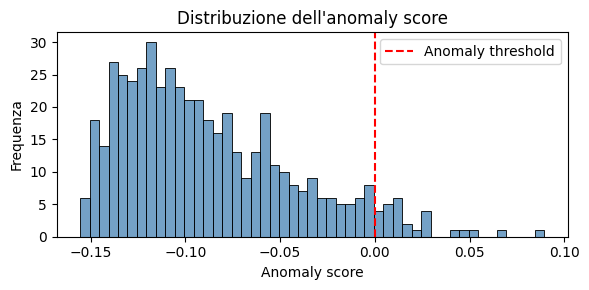

In [4]:
project_utils.plot_anomaly_distribution(scores)

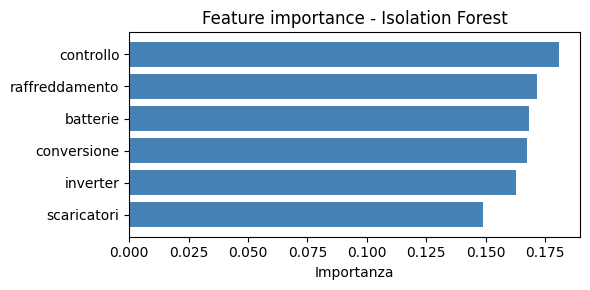

In [5]:
project_utils.plot_feature_importance(model, model_var)

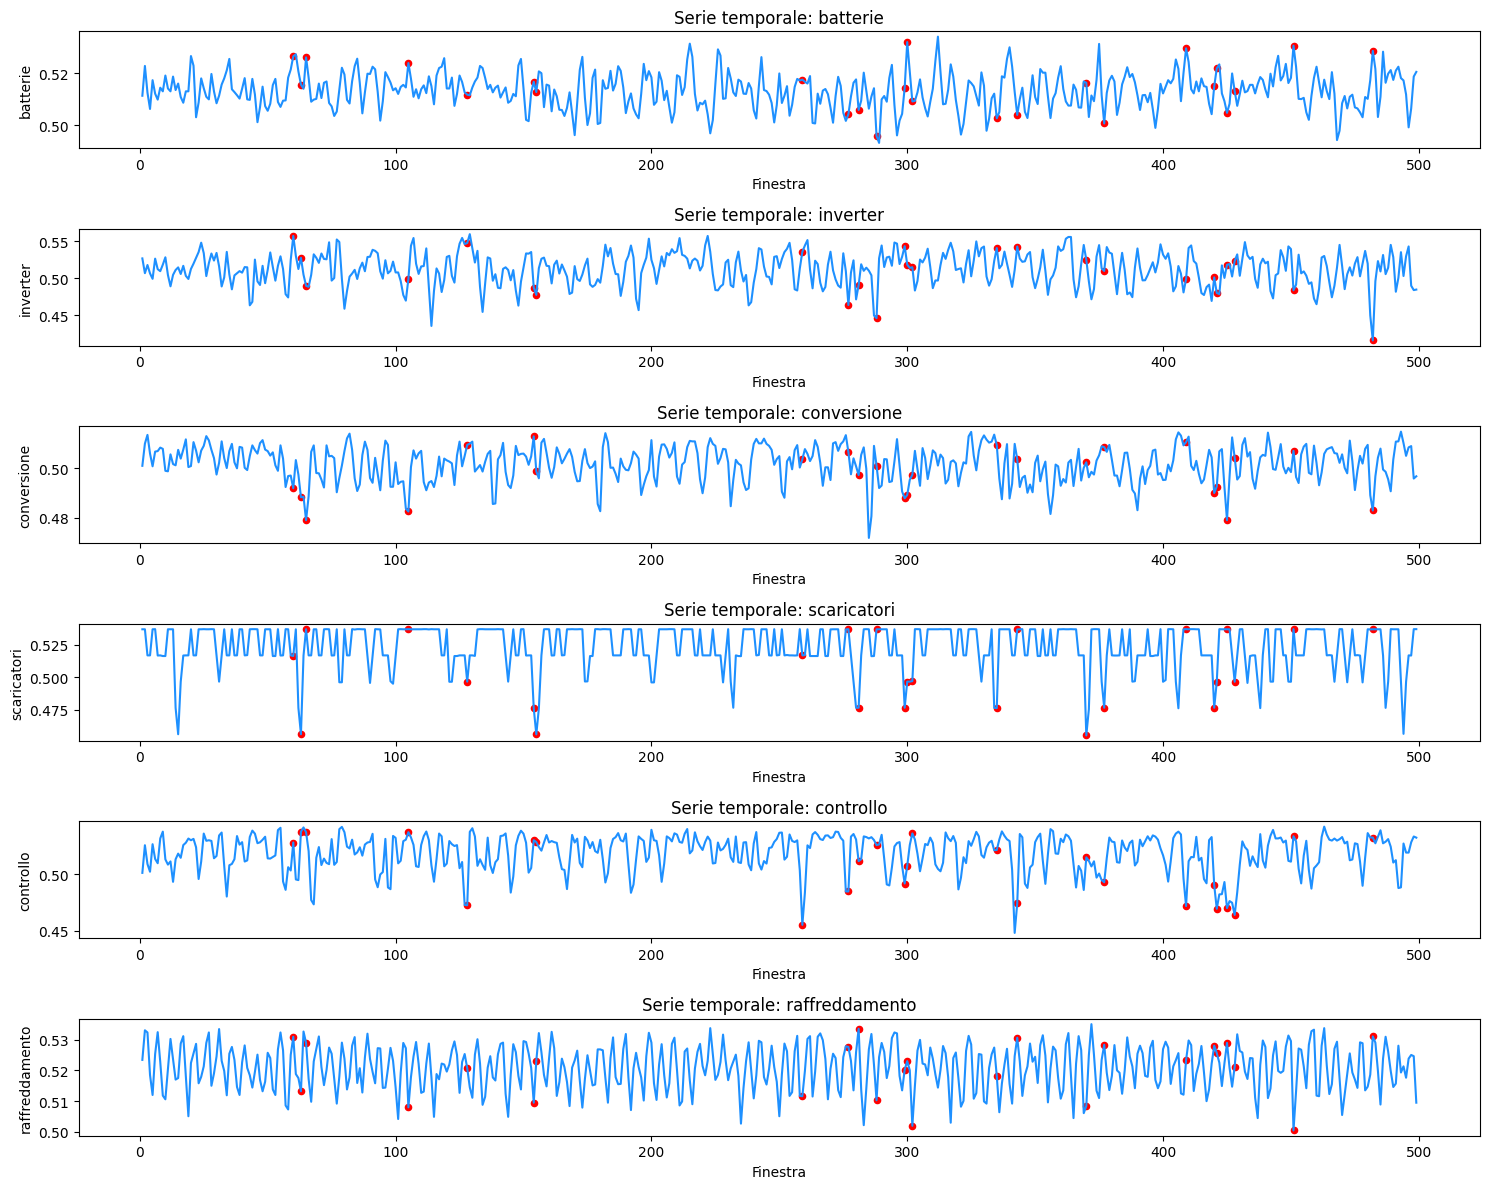

In [6]:
project_utils.plot_time_series_outliers(df, model_var, labels)

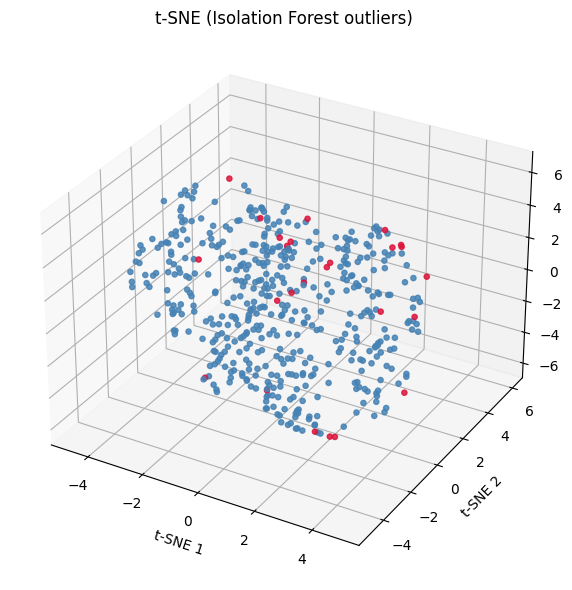

In [7]:
X_emb = project_utils.tsne_embedding(df, model_var)
project_utils.plot_tsne_3d(X_emb, df["outlier_iforest"])

# Comparison between Isolation Forest and DBscan (Euclidean distance)

In [8]:
labels, anomalies_dbscan, cluster_name = project_utils.run_dbscan(df, model_var, eps=0.021, min_samples=5)
df["cluster"]                    = labels
df["anomaly_DBscan_euclidean"]   = anomalies_dbscan
df["cluster_name"]               = cluster_name

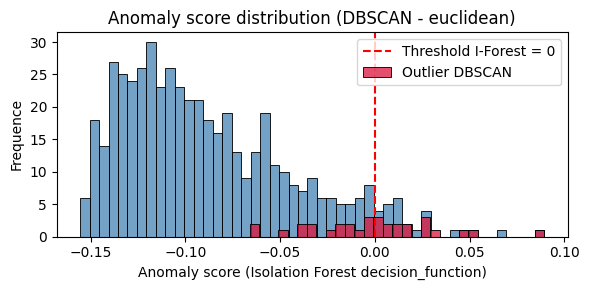

In [9]:
project_utils.compare_anomaly_score_dist(df["anomaly_score"], anomalies_dbscan)

# Comparison between Isolation Forest and DBscan (Mahalanobis' distance)

In [10]:
df_num = df[model_var]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

In [11]:
df_scaled = pd.DataFrame(
    df_scaled,
    columns = model_var,
    index = df.index
)

labels_mah, anomalies_mah, name_lbl_mah = project_utils.run_dbscan_mahalanobis(
    df_scaled,
    model_var,
    eps = 1.59,
    min_samples = 4,
)

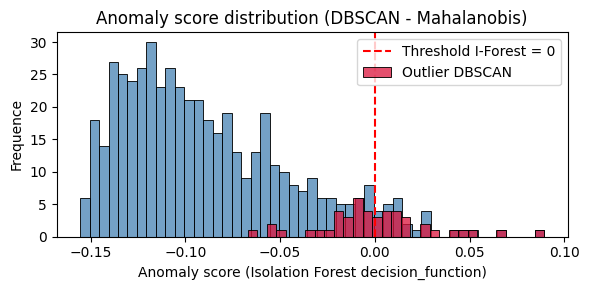

In [12]:
project_utils.compare_anomaly_score_dist(
    df["anomaly_score"],
    anomalies_mah,
    title = "Anomaly score distribution (DBSCAN - Mahalanobis)")